# TRAF7
The TRAF7 gene encodes a member of a family of proteins known as tumor necrosis factor (TNF; see 191160) receptor-associated factors, which are signal transducers for members of the TNF receptor superfamily. [cardiac, facial, and digital anomalies with developmental delay (CAFDADD)](https://omim.org/entry/618164) is caused by heterozygous mutation in the TRAF7 gene.

We searched for published genotype-phenotype correlations but did not identify any relevant publications (Nov. 8, 2024).

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.7.1.dev0


In [2]:
gene_symbol = 'TRAF7'
mane_tx_id = 'NM_032271.3'
mane_protein_id = 'NP_115647.2' # E3 ubiquitin-protein ligase TRAF7

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.21' 
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

print(f'Loaded {len(phenopackets)} phenopackets ({gene_symbol})')


cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')
qc.summarize()

Loaded 45 phenopackets (TRAF7)
Individuals Processed: 100%|██████████| 45/45 [00:00<00:00, 496.16individuals/s]
Loaded 45 individuals
Validated under permissive policy
No errors or warnings were found


In [5]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Patent ductus arteriosus,HP:0001643,23
Short neck,HP:0000470,20
Blepharophimosis,HP:0000581,20
Epicanthus,HP:0000286,19
Global developmental delay,HP:0001263,19
Feeding difficulties,HP:0011968,17
Hypertelorism,HP:0000316,16
Pectus carinatum,HP:0000768,15
Delayed speech and language development,HP:0000750,15
Hypotonia,HP:0001252,14


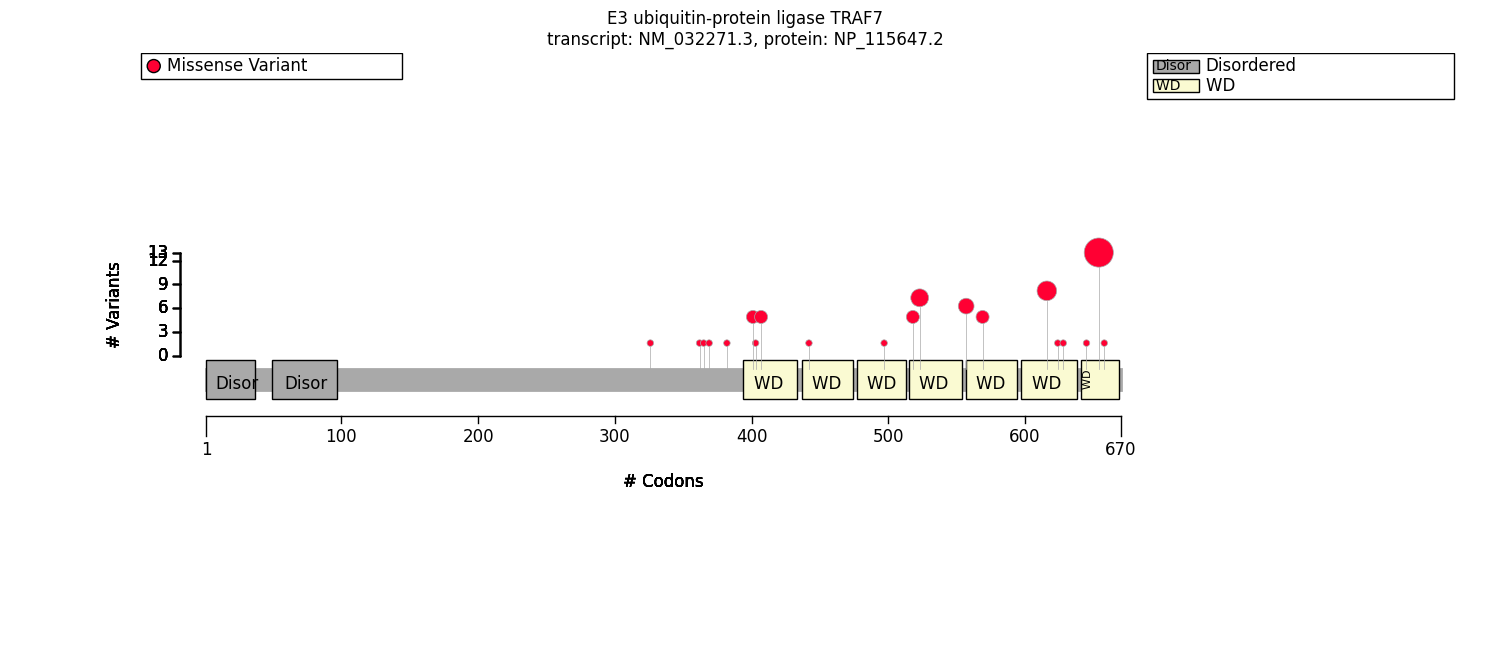

In [7]:
from gpsea.model.genome import GRCh38
from gpsea.model import ProteinMetadata
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()

In [9]:
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest

pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)
len(pheno_predicates)
from gpsea.analysis.mtc_filter import HpoMtcFilter
mtc_filter = HpoMtcFilter.default_filter(hpo=hpo,)
mtc_correction = 'fdr_bh'
mtc_alpha = 0.05
from gpsea.analysis.pcats.stats import FisherExactTest

count_statistic = FisherExactTest()
from gpsea.analysis.pcats import HpoTermAnalysis

analysis = HpoTermAnalysis(
    count_statistic=count_statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=mtc_alpha,
)

In [11]:
from gpsea.model import VariantEffect
from gpsea.model.genome import Region
from gpsea.view import MtcStatsViewer
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate

n_term = VariantPredicates.region(region=Region(600, 670), tx_id=mane_tx_id)
nterm_predicate = monoallelic_predicate(
    a_predicate=n_term,
    b_predicate=~n_term,
    a_label="600-670",
    b_label="other"
)
nterm_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=nterm_predicate,
    pheno_predicates=pheno_predicates,
)

viewer = MtcStatsViewer()
viewer.process(nterm_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,15
HMF03,Skipping term because of a child term with the same individual counts,8
HMF08,Skipping general term,126
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,745


In [12]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=nterm_result)

Allele group                                       600-670          other  \
                                                     Count Percent  Count   
Feeding difficulties [HP:0011968]                     9/16     56%  12/19   
Abdominal symptom [HP:0011458]                       10/10    100%  12/12   
Motor delay [HP:0001270]                               7/7    100%  14/15   
Neurodevelopmental delay [HP:0012758]                17/17    100%  21/21   
Neurodevelopmental abnormality [HP:0012759]          20/20    100%  21/21   
Abnormal axial skeleton morphology [HP:0009121]      20/20    100%  18/18   
Patent ductus arteriosus [HP:0001643]                12/12    100%  11/11   
Abnormal morphology of the great vessels [HP:00...   13/13    100%  12/12   
Abnormal blood vessel morphology [HP:0033353]        15/15    100%  13/13   
Hearing impairment [HP:0000365]                        9/9    100%  10/10   
Short neck [HP:0000470]                              11/11    100%    9/9   
Abnormality of the vertebral column [HP:0000925]     15/15    100%  12/12   
Abnormal location of ears [HP:0000357]                 7/7    100%  12/12   
Abnormal pinna morphology [HP:0000377]                 9/9    100%  14/14   
Abnormal eyelid morphology [HP:0000492]              19/19    100%  20/20   
Abnormal ocular adnexa morphology [HP:0030669]       19/19    100%  21/21   
Abnormality of the orbital region [HP:0000315]       19/19    100%  21/21   
Blepharophimosis [HP:0000581]                        10/10    100%  10/10   
Abnormal size of the palpebral fissures [HP:020...   11/11    100%  17/17   
Abnormality of the palpebral fissures [HP:0008050]   15/15    100%  19/19   
Abnormal speech pattern [HP:0002167]                 11/11    100%    9/9   
Abnormal communication [HP:0034434]                  11/11    100%    9/9   
Delayed speech and language development [HP:000...   11/11    100%    9/9   
Language impairment [HP:0002463]                     11/11    100%    9/9   
Epicanthus [HP:0000286]                                9/9    100%  10/10   
Abnormal oral cavity morphology [HP:0000163]         17/17    100%  14/14   
Abnormal digit morphology [HP:0011297]               12/12    100%  11/11   
Abnormal appendicular skeleton morphology [HP:0...   14/14    100%  13/13   
Abnormal thorax morphology [HP:0000765]              11/11    100%    9/9   
Abnormal external nose morphology [HP:0010938]       12/12    100%    8/8   
Abnormal nasal morphology [HP:0005105]               14/14    100%  14/14   
Abnormality of the nose [HP:0000366]                 14/14    100%  14/14   
Global developmental delay [HP:0001263]                9/9    100%  10/10   
Abnormal brain morphology [HP:0012443]                 8/8    100%  13/13   
Morphological central nervous system abnormalit...     9/9    100%  13/13   

Allele group                                                                   \
                                                   Percent Corrected p values   
Feeding difficulties [HP:0011968]                      63%                1.0   
Abdominal symptom [HP:0011458]                        100%                1.0   
Motor delay [HP:0001270]                               93%                1.0   
Neurodevelopmental delay [HP:0012758]                 100%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Abnormal axial skeleton morphology [HP:0009121]       100%                1.0   
Patent ductus arteriosus [HP:0001643]                 100%                1.0   
Abnormal morphology of the great vessels [HP:00...    100%                1.0   
Abnormal blood vessel morphology [HP:0033353]         100%                1.0   
Hearing impairment [HP:0000365]                       100%                1.0   
Short neck [HP:0000470]                               100%                1.0   
Abnormality of the vertebral column [HP:0000925]      100%                1.0   
Abnormal locatio

In [14]:
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
r655q = VariantPredicates.variant_key("16_2176350_2176350_G_A") #c.1964G>A	p.Arg655Gln
r655q_predicate = monoallelic_predicate(
    a_predicate=r655q,
    b_predicate= ~r655q,
    a_label='Arg655Gln', 
    b_label='Other variant',
)

In [15]:
r655q_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=r655q_predicate,
    pheno_predicates=pheno_predicates,
)
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, r655q_result)

Allele group                                       Arg655Gln          \
                                                       Count Percent   
Feeding difficulties [HP:0011968]                        4/8     50%   
Abdominal symptom [HP:0011458]                           5/5    100%   
Motor delay [HP:0001270]                                 5/5    100%   
Neurodevelopmental delay [HP:0012758]                  11/11    100%   
Neurodevelopmental abnormality [HP:0012759]            12/12    100%   
Abnormal axial skeleton morphology [HP:0009121]        13/13    100%   
Patent ductus arteriosus [HP:0001643]                    9/9    100%   
Abnormal morphology of the great vessels [HP:00...       9/9    100%   
Abnormal blood vessel morphology [HP:0033353]          10/10    100%   
Hearing impairment [HP:0000365]                          7/7    100%   
Short neck [HP:0000470]                                  6/6    100%   
Abnormality of the vertebral column [HP:0000925]         9/9    100%   
Abnormal location of ears [HP:0000357]                   5/5    100%   
Abnormal pinna morphology [HP:0000377]                   6/6    100%   
Abnormal eyelid morphology [HP:0000492]                11/11    100%   
Abnormal ocular adnexa morphology [HP:0030669]         11/11    100%   
Abnormality of the orbital region [HP:0000315]         11/11    100%   
Blepharophimosis [HP:0000581]                            5/5    100%   
Abnormal size of the palpebral fissures [HP:020...       5/5    100%   
Abnormality of the palpebral fissures [HP:0008050]       8/8    100%   
Abnormal speech pattern [HP:0002167]                     6/6    100%   
Abnormal communication [HP:0034434]                      6/6    100%   
Delayed speech and language development [HP:000...       6/6    100%   
Language impairment [HP:0002463]                         6/6    100%   
Epicanthus [HP:0000286]                                  7/7    100%   
Abnormal oral cavity morphology [HP:0000163]             9/9    100%   
Abnormal digit morphology [HP:0011297]                   9/9    100%   
Abnormal appendicular skeleton morphology [HP:0...     10/10    100%   
Abnormal thorax morphology [HP:0000765]                  7/7    100%   
Abnormal external nose morphology [HP:0010938]           8/8    100%   
Abnormal nasal morphology [HP:0005105]                   9/9    100%   
Abnormality of the nose [HP:0000366]                     9/9    100%   
Global developmental delay [HP:0001263]                  7/7    100%   
Abnormal brain morphology [HP:0012443]                   5/5    100%   
Morphological central nervous system abnormalit...       6/6    100%   

Allele group                                       Other variant          \
                                                           Count Percent   
Feeding difficulties [HP:0011968]                          17/27     63%   
Abdominal symptom [HP:0011458]                             17/17    100%   
Motor delay [HP:0001270]                                   16/17     94%   
Neurodevelopmental delay [HP:0012758]                      27/27    100%   
Neurodevelopmental abnormality [HP:0012759]                29/29    100%   
Abnormal axial skeleton morphology [HP:0009121]            25/25    100%   
Patent ductus arteriosus [HP:0001643]                      14/14    100%   
Abnormal morphology of the great vessels [HP:00...         16/16    100%   
Abnormal blood vessel morphology [HP:0033353]              18/18    100%   
Hearing impairment [HP:0000365]                            12/12    100%   
Short neck [HP:0000470]                                    14/14    100%   
Abnormality of the vertebral column [HP:0000925]           18/18    100%   
Abnormal location of ears [HP:0000357]                     14/14    100%   
Abnormal pinna morphology [HP:0000377]                     17/17    100%   
Abnormal eyelid morphology [HP:0000492]                    28/28    100%   
Abnormal ocular adnexa morphology [HP:00306

In [17]:
from gpsea.analysis.predicate.genotype import sex_predicate

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=sex_predicate(),
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo, mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
Feeding difficulties [HP:0011968]                    7/12     58%  14/23   
Abdominal symptom [HP:0011458]                        8/8    100%  14/14   
Motor delay [HP:0001270]                            10/11     91%  11/11   
Neurodevelopmental delay [HP:0012758]               14/14    100%  24/24   
Neurodevelopmental abnormality [HP:0012759]         15/15    100%  26/26   
Abnormal axial skeleton morphology [HP:0009121]     15/15    100%  23/23   
Patent ductus arteriosus [HP:0001643]                 8/8    100%  15/15   
Abnormal morphology of the great vessels [HP:00...    8/8    100%  17/17   
Abnormal blood vessel morphology [HP:0033353]       10/10    100%  18/18   
Hearing impairment [HP:0000365]                       6/6    100%  13/13   
Short neck [HP:0000470]                               9/9    100%  11/11   
Abnormality of the vertebral column [HP:0000925]    10/10    100%  17/17   
Abnormal location of ears [HP:0000357]                5/5    100%  14/14   
Abnormal pinna morphology [HP:0000377]                7/7    100%  16/16   
Abnormal eyelid morphology [HP:0000492]             14/14    100%  25/25   
Abnormal ocular adnexa morphology [HP:0030669]      15/15    100%  25/25   
Abnormality of the orbital region [HP:0000315]      15/15    100%  25/25   
Blepharophimosis [HP:0000581]                         7/7    100%  13/13   
Abnormal size of the palpebral fissures [HP:020...  10/10    100%  18/18   
Abnormality of the palpebral fissures [HP:0008050]  12/12    100%  22/22   
Abnormal speech pattern [HP:0002167]                  9/9    100%  11/11   
Abnormal communication [HP:0034434]                   9/9    100%  11/11   
Delayed speech and language development [HP:000...    9/9    100%  11/11   
Language impairment [HP:0002463]                      9/9    100%  11/11   
Epicanthus [HP:0000286]                               6/6    100%  13/13   
Abnormal oral cavity morphology [HP:0000163]        13/13    100%  18/18   
Abnormal digit morphology [HP:0011297]              10/10    100%  13/13   
Abnormal appendicular skeleton morphology [HP:0...  11/11    100%  16/16   
Abnormal thorax morphology [HP:0000765]               5/5    100%  15/15   
Abnormal external nose morphology [HP:0010938]        8/8    100%  12/12   
Abnormal nasal morphology [HP:0005105]                8/8    100%  20/20   
Abnormality of the nose [HP:0000366]                  8/8    100%  20/20   
Global developmental delay [HP:0001263]               2/2    100%  17/17   
Abnormal brain morphology [HP:0012443]                7/7    100%  14/14   
Morphological central nervous system abnormalit...    7/7    100%  15/15   

Sex                                                                            \
                                                   Percent Corrected p values   
Feeding difficulties [HP:0011968]                      61%                1.0   
Abdominal symptom [HP:0011458]                        100%                1.0   
Motor delay [HP:0001270]                              100%                1.0   
Neurodevelopmental delay [HP:0012758]                 100%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Abnormal axial skeleton morphology [HP:0009121]       100%                1.0   
Patent ductus arteriosus [HP:0001643]                 100%                1.0   
Abnormal morphology of the great vessels [HP:00...    100%                1.0   
Abnormal blood vessel morphology [HP:0033353]         100%                1.0   
Hearing impairment [HP:0000365]                       100%                1.0   
Short neck [HP:0000470]                               100%                1.0   
Abnormality of the vertebral column [HP:0000925]      100%                1.0   
Abnormal location of ears [HP:0000357]               

# Summary
GPSEA analysis failed to reveal evidence for statistically significant genotype-phenotype correlations in the *TRAF7* gene.